In [1]:
#Data manipulation libraries : 
import numpy as np  #numpy
import pandas as pd  #pandas
import tensorflow as tf

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#math operations lib 
import math
from math import pi

#date manipulation 
import datetime as dt


import datetime
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from collections import Counter
import time
import datetime as dt
from datetime import datetime
import collections
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib.pyplot import rcParams

import warnings 
warnings.filterwarnings(action="ignore")

# 1.- Variable identification

**Check out the data**

In [73]:
data = pd.read_csv('C:/Users/Taha/Downloads/weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 19 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null int64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null int64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
Date                        96453 non-null datetime64[ns, UTC]
year                        96453 non-null int64
month                       96453 non-null int64
day                         96453 non-null int64
hour                        96453 non-null int64
cloud (summary)             

In [4]:
# check datatypes
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [74]:
#Quantitative variables:
quantitative = data.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


In [75]:
#Categorical variables:
categorical = data.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')


In [76]:
#'Formatted Date' transformation:

data['Date'] = pd.to_datetime(data['Formatted Date'],utc=True)
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['hour'] = data['Date'].dt.hour
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,year,month,day,hour
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00,2006,3,31,22
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00,2006,3,31,23
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00,2006,4,1,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00,2006,4,1,1
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00,2006,4,1,2


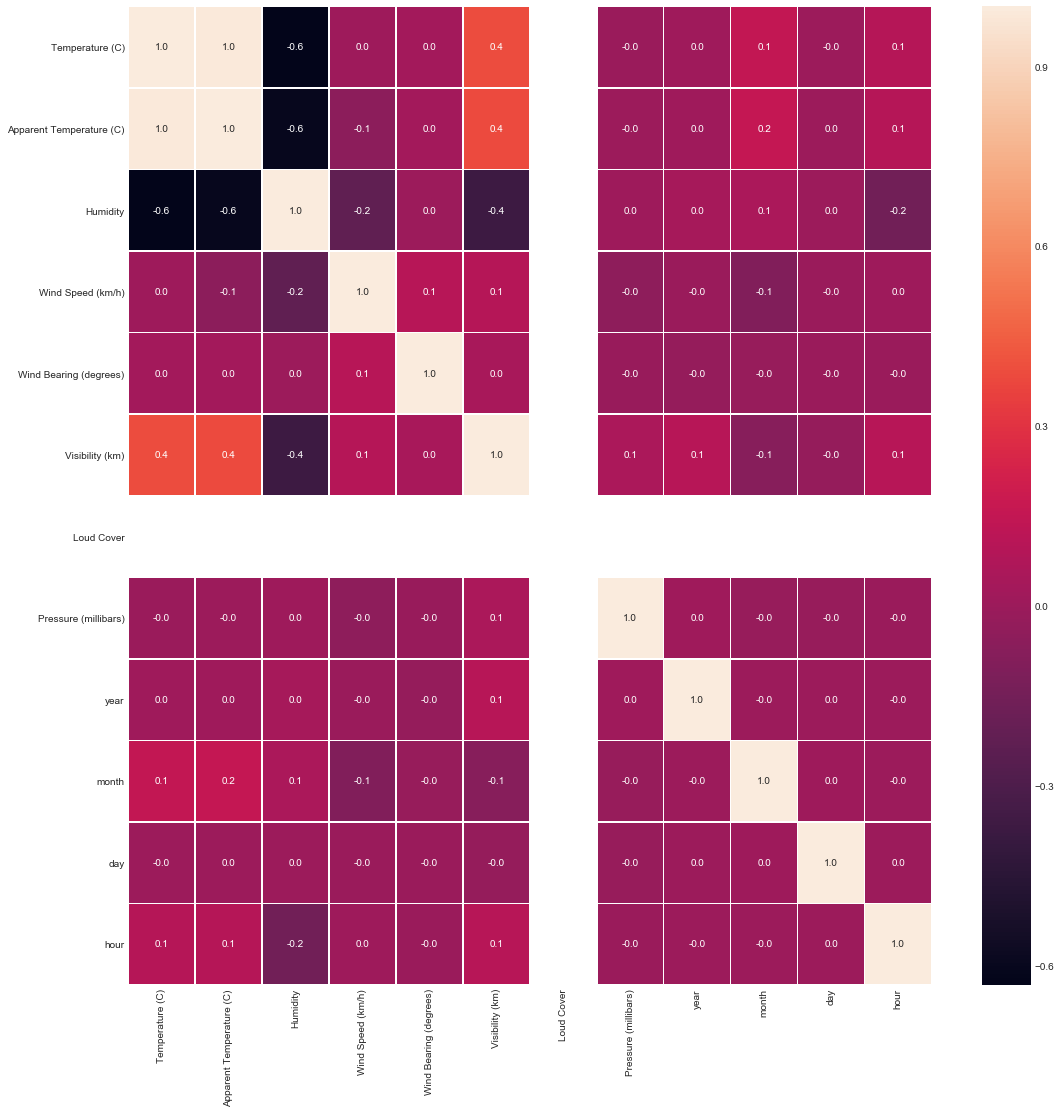

In [9]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()


# 2. Quantitative variables. Missing values

In [77]:
data[quantitative].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CB9E040B8>,
      dtype=object)

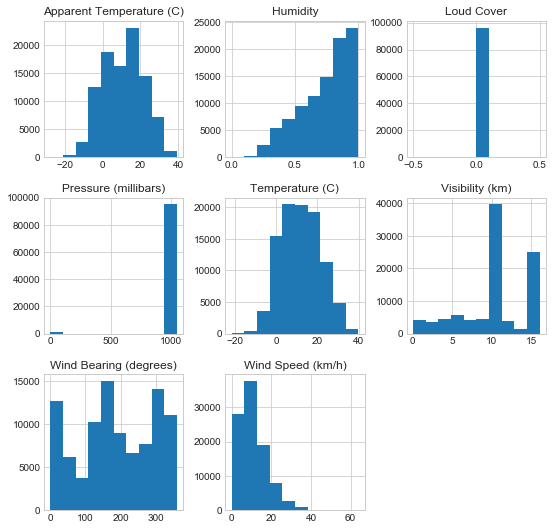

In [11]:
rcParams['figure.figsize'] = 9, 9
data[quantitative].hist()

'Loud Cover' takes values zero. We drop it

In [78]:
data=data.drop('Loud Cover',axis=1)

"Pressure (millibars)".

Some observations are nil. It seems that they lack values because the pressure does not take zero as value.

Let's fill the zeros with the median:

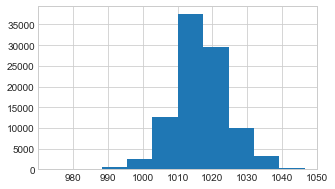

In [79]:
pressure_median = data['Pressure (millibars)'].median()
      
def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x
        
data["Pressure (millibars)"] = data.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)

rcParams['figure.figsize'] = 5, 3
data['Pressure (millibars)'].hist()


# 3. Categorical variables. Feature Engineering

In [80]:
#new categorical variable:
def cloud_categorizer(row):
   row = str(row).lower()
   category = ""
   if "foggy" in row:
       category = 5
   elif "overcast" in row:
       category = 4
   elif "mostly cloudy" in row:
       category = 3
   elif "partly cloudy" in row:
       category = 2
   elif "clear" in row:
       category = 1
   else:
       category = 0
   return category 

data["cloud (summary)"] = data.apply (lambda row:cloud_categorizer(row["Summary"]) , axis = 1)

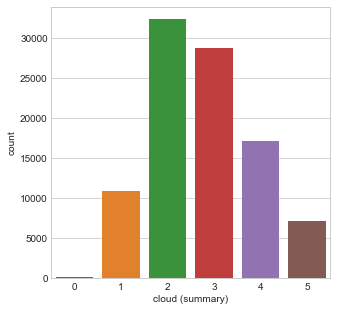

In [16]:
rcParams['figure.figsize'] = 5, 5
sns.countplot(data['cloud (summary)'])

As can be observed, there are a few observations with no information about "clouds" or foggy in variable 'Summary'.

How can we assign a value to them?

I decided to look at variable 'Visibility (km)', which obviously is correlated to "clouds" and foggy.

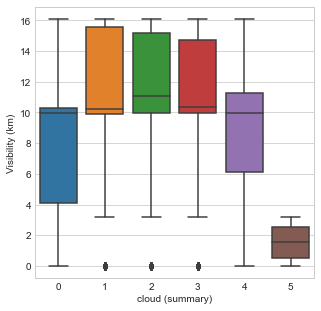

In [17]:
sns.boxplot(x=data['cloud (summary)'], y=data['Visibility (km)']) 

It seems that the boxplot of the null values is very similar to the one of "overcast"so let's assume that obsevations with no information about "clouds" and foggy fall in the "overcast" category.

In [81]:
def cloud_categorizer(row):
    row = str(row).lower()
    category = ""
    if "foggy" in row:
        category = 5
    elif "overcast" in row:
        category = 4
    elif "mostly cloudy" in row:
        category = 3
    elif "partly cloudy" in row:
        category = 2
    elif "clear" in row:
        category = 1
    else:
        category = 4 
    return category 

data["cloud (summary)"] = data.apply (lambda row:cloud_categorizer(row["Summary"]) , axis = 1)

[Text(0, 0, '1=Clear'),
 Text(0, 0, '2=Partly Cloudy'),
 Text(0, 0, '3=Mostly Cloudy'),
 Text(0, 0, '4=Overcast'),
 Text(0, 0, '5=Foggy')]

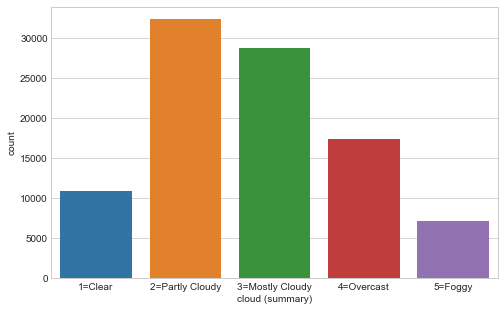

In [21]:
rcParams['figure.figsize'] = 8, 5
ax=sns.countplot(data['cloud (summary)'])
ax.set_xticklabels(('1=Clear', '2=Partly Cloudy', '3=Mostly Cloudy', '4=Overcast', '5=Foggy'))

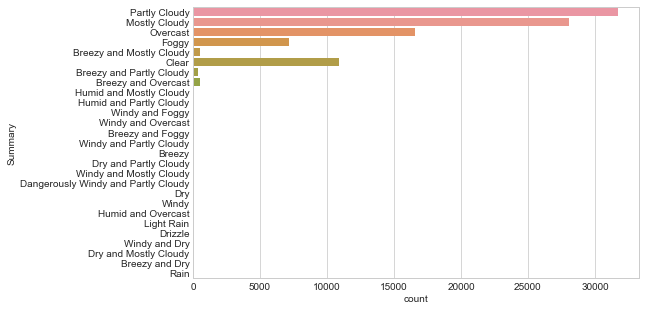

In [14]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=data['Summary'])

[Text(0, 0, '1=Clear'),
 Text(0, 0, '2=Partly Cloudy'),
 Text(0, 0, '3=Mostly Cloudy'),
 Text(0, 0, '4=Overcast'),
 Text(0, 0, '5=Foggy')]

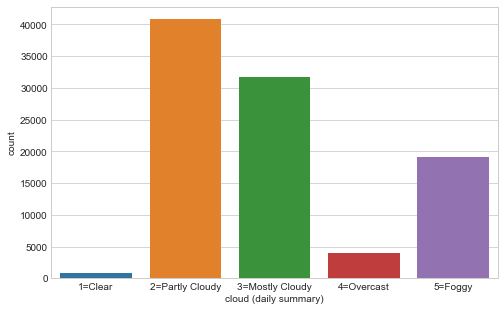

In [22]:
#Let's create a new variable called 'cloud (daily summary)' using the same function we created for 'cloud (summary)'

data["cloud (daily summary)"] = data.apply (lambda row:cloud_categorizer(row["Daily Summary"]) , axis = 1)
rcParams['figure.figsize'] = 8, 5
ax=sns.countplot(data['cloud (daily summary)'])
ax.set_xticklabels(('1=Clear', '2=Partly Cloudy', '3=Mostly Cloudy', '4=Overcast', '5=Foggy'))

In [17]:
data['Precip Type'].value_counts(dropna=False)

rain    85224
snow    10712
NaN       517
Name: Precip Type, dtype: int64

In [18]:
data.fillna(method='ffill', inplace=True)

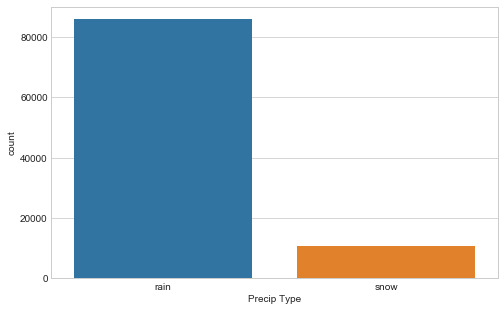

In [19]:
sns.countplot(x=data['Precip Type'])

In [84]:
summarylist=list(dict.fromkeys(data['Daily Summary']))

def change_dailysummary_to_number(DailySummaryCat):
    j=0
    for i in summarylist:
        j+=1
        if DailySummaryCat==i:
            return j

In [85]:
# assign a numerical value to the categorical field of class, by using the above function
data['DailySummaryCat'] = data['Daily Summary'].apply(change_dailysummary_to_number)

In [86]:
data.fillna(method='ffill', inplace=True)

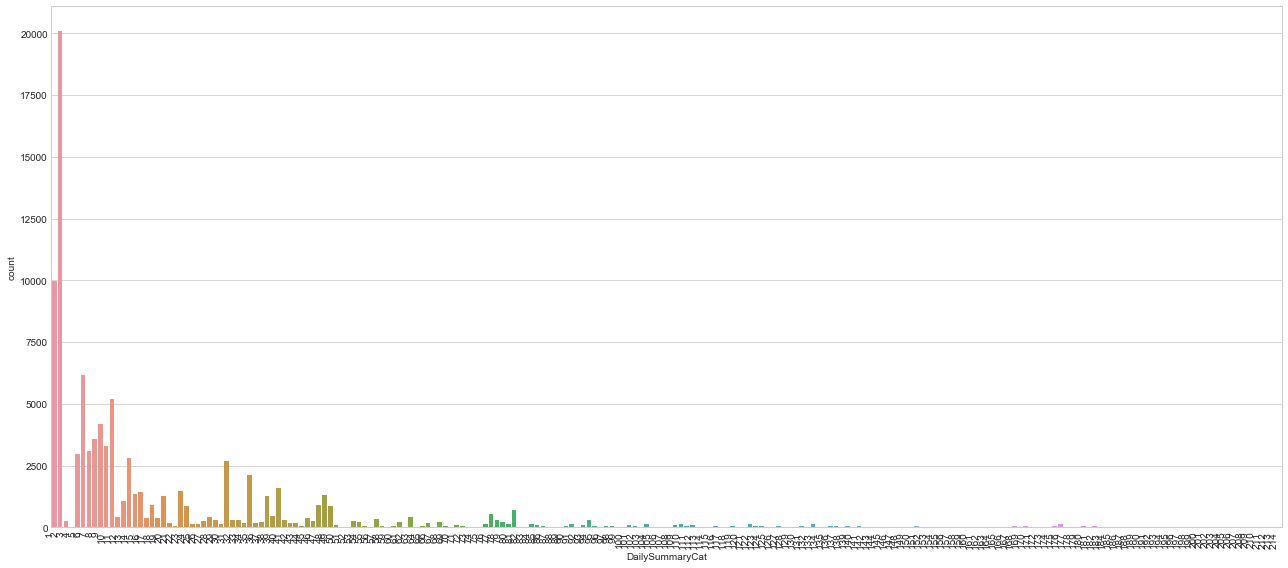

In [133]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=data['DailySummaryCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [87]:
summarylist2=list(dict.fromkeys(data['Summary']))

def change_summary_to_number(SummaryCat):
    j=0
    for i in summarylist2:
        j+=1
        if SummaryCat==i:
            return j

In [88]:
# assign a numerical value to the categorical field of class, by using the above function
data['SummaryCat'] = data['Summary'].apply(change_summary_to_number)

In [89]:
data.fillna(method='ffill', inplace=True)

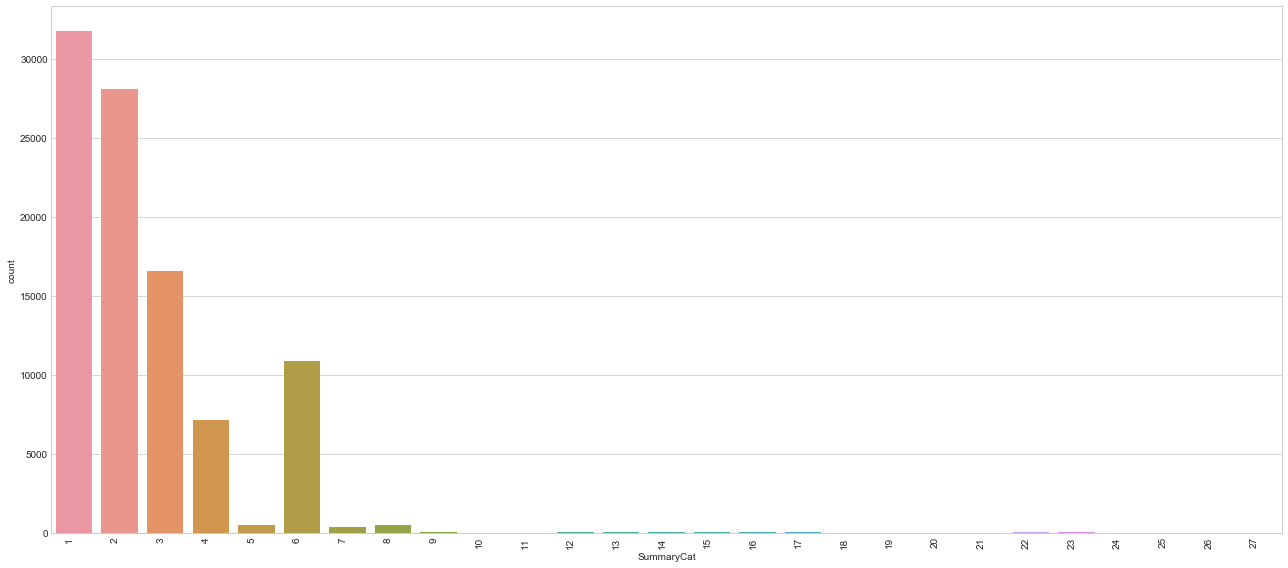

In [136]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=data['SummaryCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [90]:
def change_category(PrecipTypeCat):
    if PrecipTypeCat=='rain':
        return 1
    elif PrecipTypeCat=='snow':
        return 2

In [91]:
# assign a numerical value to the categorical field of class, by using the above function
data['PrecipTypeCat'] = data['Precip Type'].apply(change_category)

In [92]:
data.fillna(method='ffill', inplace=True)

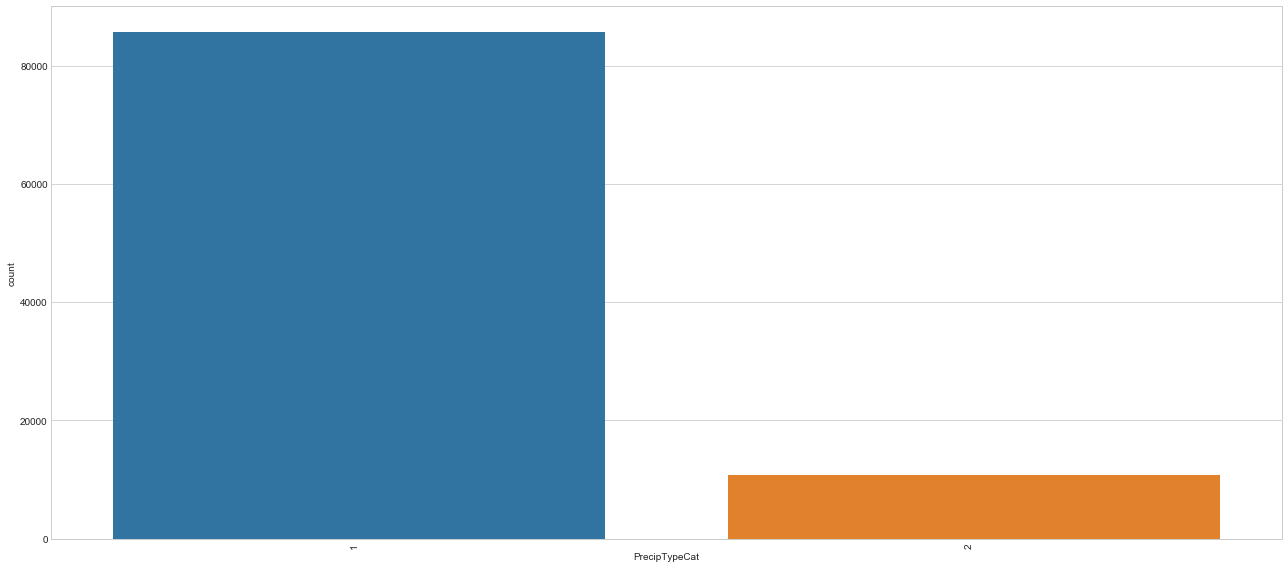

In [139]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=data['PrecipTypeCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

## Data Visualization.

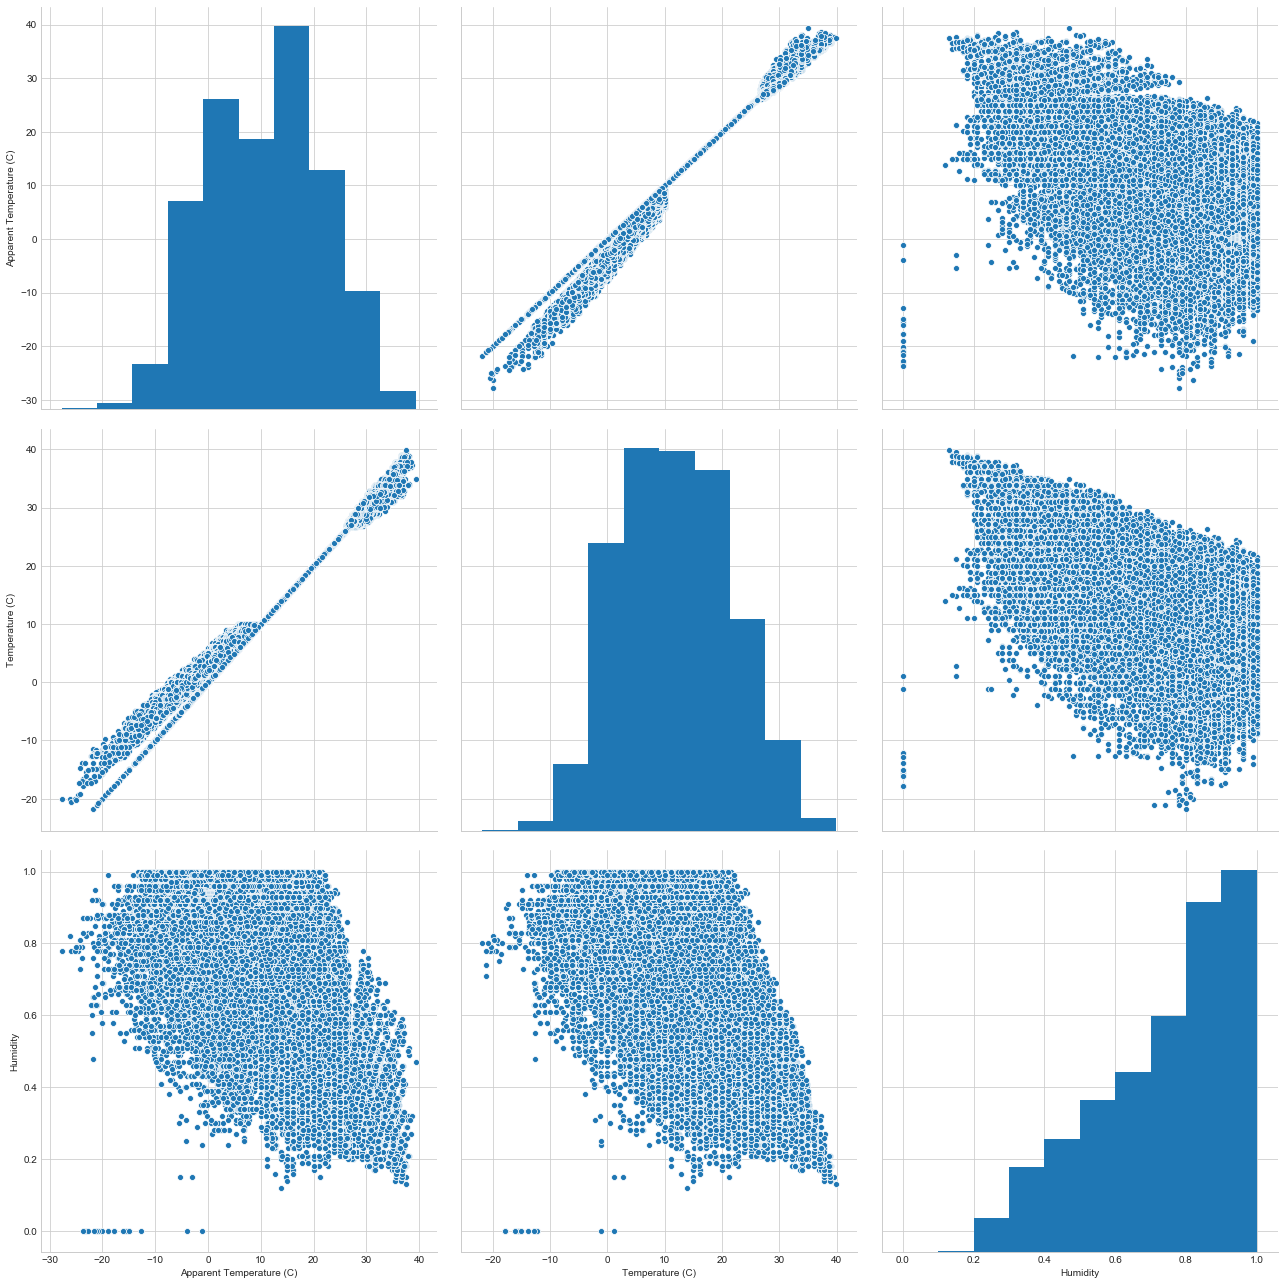

In [35]:
# this creates a figure 8 inch wide, 4 inch high
# plt.figure(figsize=(20,20))
# rcParams['figure.figsize'] = 20, 20
sns.pairplot(data[['Apparent Temperature (C)','Temperature (C)', 'Humidity' ]],size=6, aspect=1)
plt.show()

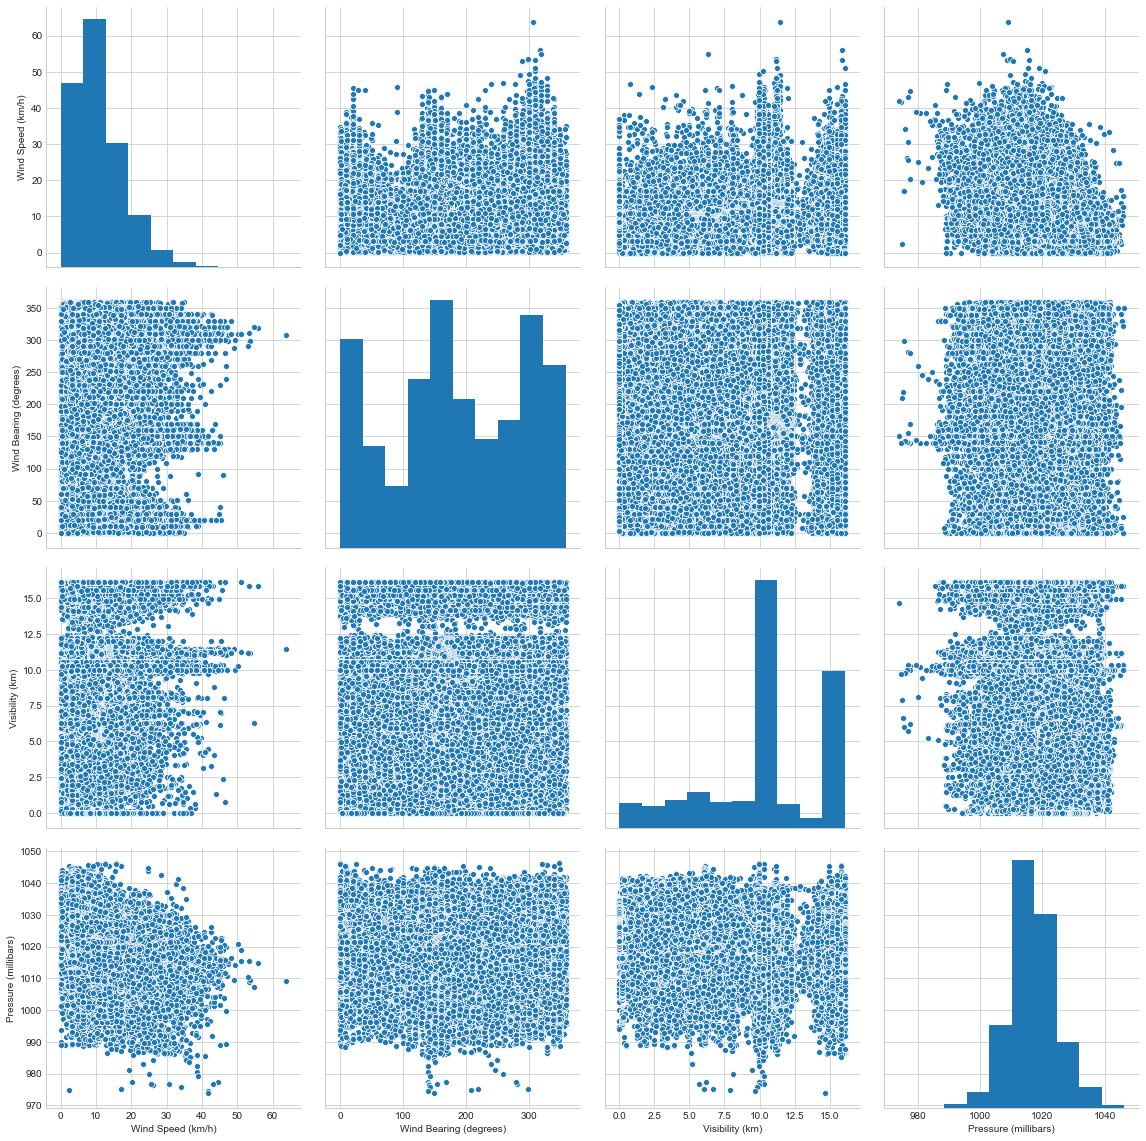

In [42]:
# plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(data[['Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']], size=4,aspect=1)
plt.show()

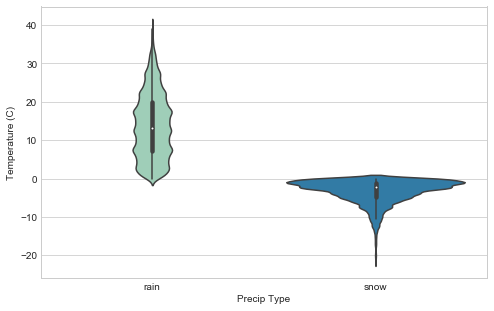

In [22]:
sns.violinplot(x="Precip Type", y="Temperature (C)", data=data, palette="YlGnBu");

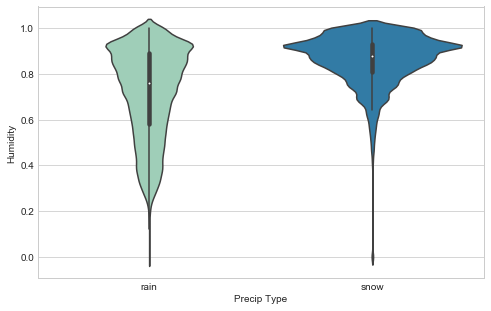

In [23]:
sns.violinplot(x="Precip Type", y="Humidity", data=data, palette="YlGnBu");

# 4. EDA, Statistical Analysis (Data Story).

In [13]:
#How many different 'Summary' categories are there?
len(data['Summary'].unique())

27

In [16]:
data['Summary'].value_counts(dropna=False)

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [14]:
#relative frequencies
summary_freq=pd.crosstab(index=data['Summary'],columns="count")  
summary_freq_rel = summary_freq/summary_freq.sum() 
summary_freq_rel.sort_values('count', ascending=False)

col_0,count
Summary,
Partly Cloudy,0.329000
Mostly Cloudy,0.291271
Overcast,0.172073
Clear,0.112905
Foggy,0.074109
Breezy and Overcast,0.005474
Breezy and Mostly Cloudy,0.005350
Breezy and Partly Cloudy,0.004002
Dry and Partly Cloudy,0.000892


Most common categories are: Partly Cloudy (33%), Mostly Cloudy(29%), Overcast (17%), Clear (11%), Foggy(7%) = 97% out of the total.  
Moreover, these weather conditions also appear  with other weather characteristics. E.g. 'Windy and Foggy'.  
Let's create a new categorical variable:
Cloud (summary) : Foggy (5), Overcast (4), Mostly Cloudy (3), Partly Cloudy (2), Clear (1), Nothing (0)  
There are other weather characteristics contained in 'Summary': Windy&Breezy, Rain, Humid&Dry but there are just a few observations within these categories. Moreover this information is already contained in other variables: 'Wind Speed (km/h)', 'Precip Type' and 'Humidity'.

In [5]:
len(data['Daily Summary'].unique()) #How many different 'Daily Summary' categories are there?

214

In [15]:
data['Daily Summary'].value_counts(dropna=False)

Mostly cloudy throughout the day.                                                                                        20085
Partly cloudy throughout the day.                                                                                         9981
Partly cloudy until night.                                                                                                6169
Partly cloudy starting in the morning.                                                                                    5184
Foggy in the morning.                                                                                                     4201
Foggy starting overnight continuing until morning.                                                                        3576
Partly cloudy until evening.                                                                                              3288
Mostly cloudy until night.                                                                                     

In [7]:
#Show the 10 most common categories
daily_summary_freq =pd.crosstab(index=data['Daily Summary'],columns="count") 
daily_summary_freqrel=daily_summary_freq/daily_summary_freq.sum()
daily_summary_freqrel.sort_values('count', ascending=False).head(10)

col_0,count
Daily Summary,
Mostly cloudy throughout the day.,0.208236
Partly cloudy throughout the day.,0.103480
Partly cloudy until night.,0.063959
Partly cloudy starting in the morning.,0.053746
Foggy in the morning.,0.043555
Foggy starting overnight continuing until morning.,0.037075
Partly cloudy until evening.,0.034089
Mostly cloudy until night.,0.032088
Overcast throughout the day.,0.030606
